# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [74]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 646


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [79]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# http://api.openweathermap.org/data/2.5/weather?appid=6700e82667fbbf758942052a80e10b88&units=metric&q=rikitea
# Define an empty list to fetch the weather data for each city
city_data = []
city_nam = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    #respond = requests.get(city_url + city).json()
    #respond = requests.get(city_url + city).json()
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
    record_count += 1

   
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        cit = city_nam.append(city_weather['name'])
        lat = city_lat.append(city_weather['coord']['lat'])
        lng = city_lng.append(city_weather['coord']['lon'])
        max_temp = city_max_temp.append(city_weather['main']['temp_max'])
        humidity = city_humidity.append(city_weather['main']['humidity'])
        clouds = city_clouds.append(city_weather['clouds']['all'])
        wind = city_wind.append(city_weather['wind']['speed'])
        country = city_country.append(city_weather['sys']['country'])
        date = city_date.append(city_weather['dt'])

        # Append the City information into city_data list
        city_data = {"City": city_nam,
                        "Lat": city_lat,  
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date}

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | panzhihua
Processing Record 2 of Set 1 | longyearbyen
Processing Record 3 of Set 1 | hihya
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | svetlaya
Processing Record 8 of Set 1 | itainopolis
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 11 of Set 1 | mount isa
Processing Record 12 of Set 1 | amderma
City not found. Skipping...
Processing Record 13 of Set 1 | wanaka
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | louisbourg
City not found. Skipping...
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | den helder
Processing Record 20 of Set 1 | port al

In [84]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Panzhihua,26.5851,101.7128,9.65,40,49,1.31,CN,1674531010
1,Longyearbyen,78.2186,15.6401,-3.09,63,40,4.12,SJ,1674530711
2,Hihyā,30.6713,31.5880,12.08,93,0,3.27,EG,1674531012
3,Hermanus,-34.4187,19.2345,18.03,80,1,6.71,ZA,1674531013
4,Bluff,-46.6000,168.3333,13.72,59,15,5.83,NZ,1674531014
...,...,...,...,...,...,...,...,...,...
590,Callaway,30.1530,-85.5699,9.96,85,0,2.06,US,1674531572
591,Port Keats,-14.2500,129.5500,33.44,54,57,2.25,AU,1674531573
592,Maceió,-9.6658,-35.7353,24.69,94,20,1.54,BR,1674531313
593,Kapit,2.0167,112.9333,29.06,75,94,1.31,MY,1674531575


In [92]:
# Export the City_Data into a csv
from pathlib import Path
filepath = Path('C:/Boot_Camp/6_API/Assignment/Starter_Code/output_data/cities.csv')
city_data_df.to_csv(filepath, index_label="City_ID")

In [94]:
# Read saved data
city_data_df = pd.read_csv(filepath, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Panzhihua,26.5851,101.7128,9.65,40,49,1.31,CN,1674531010
1,Longyearbyen,78.2186,15.6401,-3.09,63,40,4.12,SJ,1674530711
2,Hihyā,30.6713,31.5880,12.08,93,0,3.27,EG,1674531012
3,Hermanus,-34.4187,19.2345,18.03,80,1,6.71,ZA,1674531013
4,Bluff,-46.6000,168.3333,13.72,59,15,5.83,NZ,1674531014


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

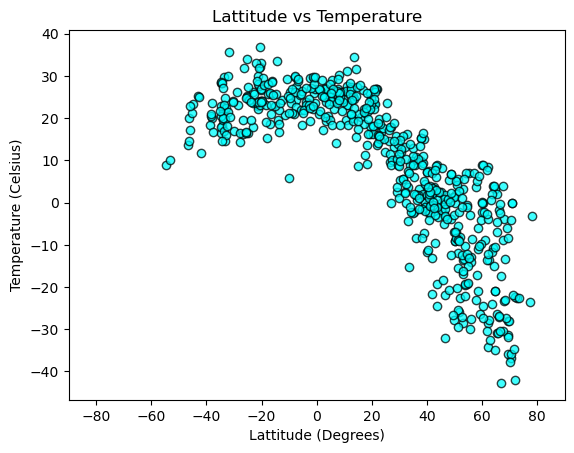

In [109]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
x_axis_1 = city_data_df['Lat']
y_axis_1 = city_data_df['Max Temp']
plt.scatter(x_axis_1, y_axis_1, marker="o", facecolors="cyan", edgecolors="black",
            alpha=0.75)


# Incorporate the other graph properties
plt.title("Lattitude vs Temperature")
plt.xlabel("Lattitude (Degrees)")
plt.ylabel("Temperature (Celsius)")
plt.xlim(-90,90)
# Save the figure
plt.savefig('Fig1.png')

# Show plot
plt.show()

#### Latitude Vs. Humidity

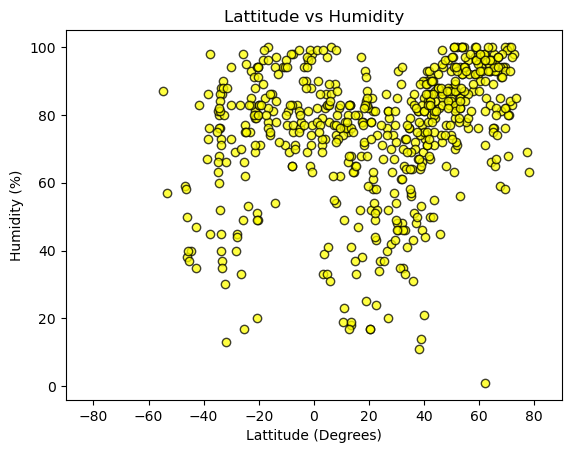

In [108]:
# Build the scatter plots for latitude vs. humidity
x_axis_2 = city_data_df['Lat']
y_axis_2 = city_data_df['Humidity']
plt.scatter(x_axis_2, y_axis_2, marker="o", facecolors="yellow", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("Lattitude vs Humidity")
plt.xlabel("Lattitude (Degrees)")
plt.ylabel("Humidity (%)")
plt.xlim(-90,90)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

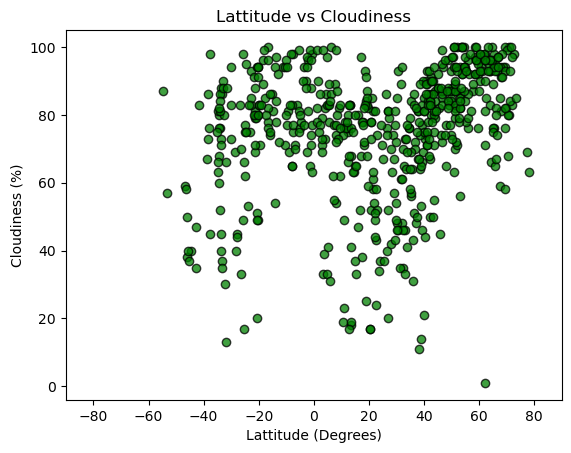

In [112]:
# Build the scatter plots for latitude vs. cloudiness
x_axis_3 = city_data_df['Lat']
y_axis_3 = city_data_df['Cloudiness']
plt.scatter(x_axis_2, y_axis_2, marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("Lattitude vs Cloudiness")
plt.xlabel("Lattitude (Degrees)")
plt.ylabel("Cloudiness (%)")
plt.xlim(-90,90)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

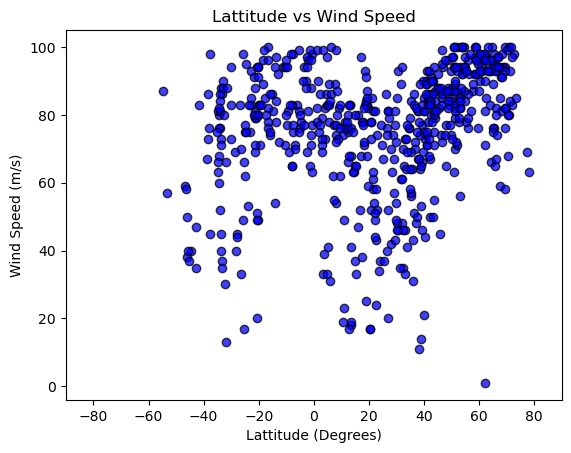

In [113]:
# Build the scatter plots for latitude vs. wind speed
x_axis_4 = city_data_df['Lat']
y_axis_4 = city_data_df['Wind Speed']
plt.scatter(x_axis_2, y_axis_2, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

# Incorporate the other graph properties
plt.title("Lattitude vs Wind Speed")
plt.xlabel("Lattitude (Degrees)")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-90,90)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [122]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) >= 0]

# Display sample data
northern_hemi_df.head()
northern_hemi_df["Lat"].min()

1.0

In [126]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]) < 0]

# Display sample data
southern_hemi_df.head()
southern_hemi_df["Lat"].max()

-0.6

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8451717012641966


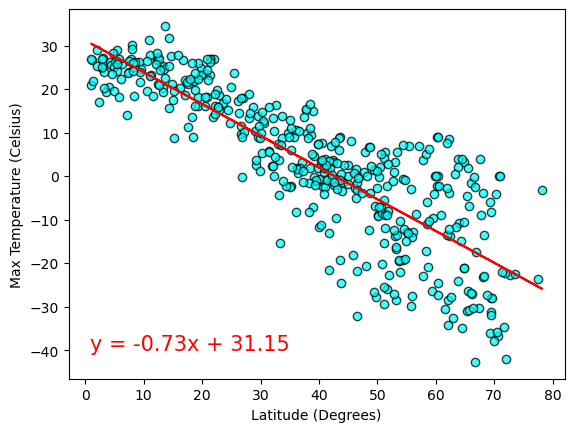

In [151]:
# Define a function to create Linear Regression plots
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="cyan", edgecolors="black",
            alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.8,-40),fontsize=15,color="red")
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Max Temperature (Celsius)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.3614441662955178


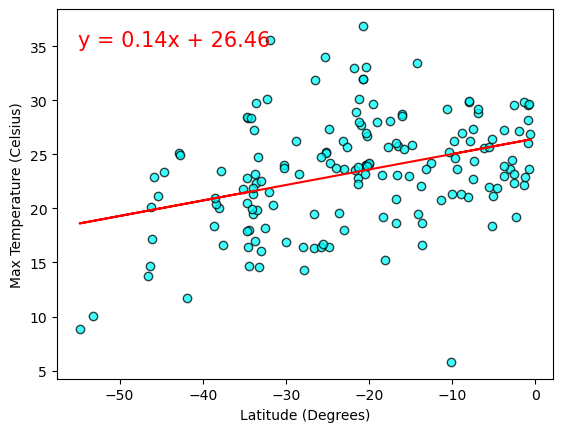

In [152]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="cyan", edgecolors="black",
            alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,35),fontsize=15,color="red")
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Max Temperature (Celsius)')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4077126600503165


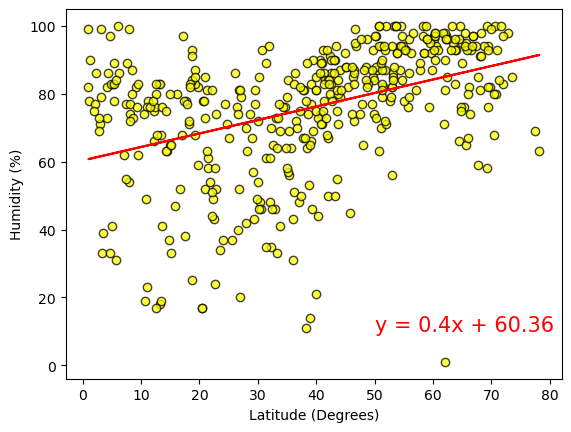

In [153]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="yellow", edgecolors="black",
            alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.42503339678025287


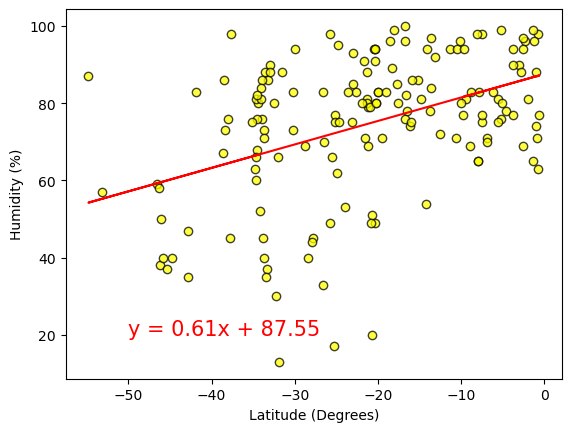

In [154]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="yellow", edgecolors="black",
            alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.34494494646809165


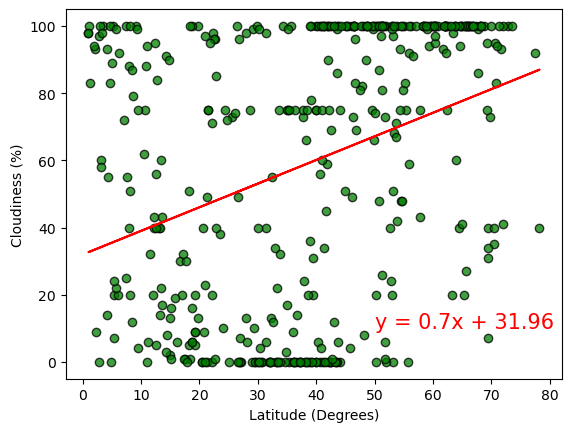

In [155]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: 0.4948045187312253


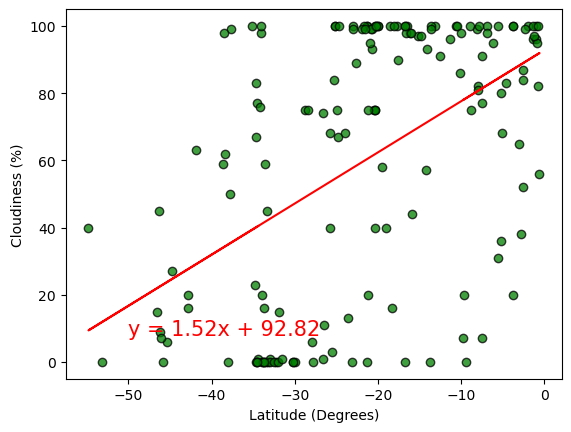

In [156]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="green", edgecolors="black",
            alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,8),fontsize=15,color="red")
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.046975698657700043


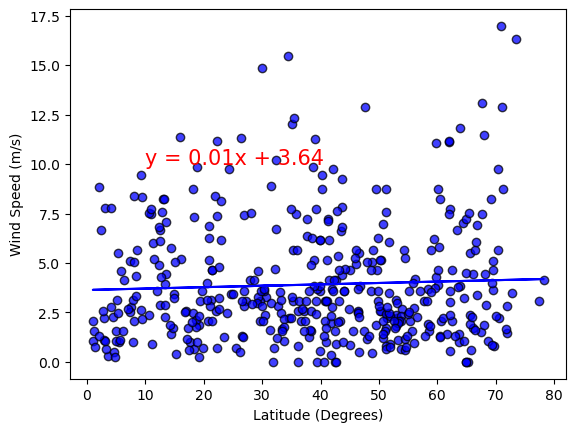

In [161]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(10,10),fontsize=15,color="red")
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.3413699876080094


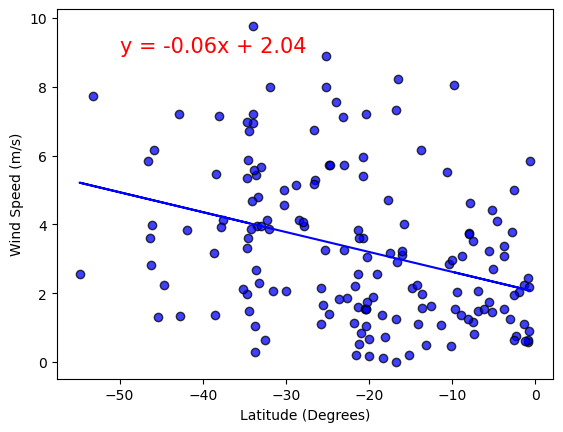

In [160]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)
plt.plot(x_values,regress_values,"b-")
plt.annotate(line_eq,(-50,9),fontsize=15,color="red")
plt.xlabel('Latitude (Degrees)')
plt.ylabel('Wind Speed (m/s)')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
###########################################################################
# Major bulletpoints from the graphs can be derived as below:
#
# 1. High r-value shows that at northern hemisphere, as lattitude increases, maximum temperature decreases. 
#   This trend is not that obvious in southern hemisphere and the reason may be it is mostly occupied by the ocean.
# 2. Effect of latitude on the humidity on both southern and northern hemisphere is nearly the same: weak positive
#   relationship with r-value ~ 40%.
# 3. Although the r-values between the latitude and cloudiness in northern and souther hemisphere are 0.34 and 0.49,
#   respectively, the scatter of data around the regression line is widely spread and sounds to be due to the random data.
# 4. The effect of latitude on wind speed is quite negligible in both cases and shows that there is no relationship.   